In [1]:
#import necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#load the dataset
df = pd.read_csv('Super_Store_data.csv', encoding='ISO-8859-1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


#Exploratory Data Analysis

In [17]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [18]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 #Findout categorical and numerical features

In [21]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 15 categorical variables

The categorical variables are :

 ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [22]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 3 numerical variables

The numerical variables are :

 ['Row ID', 'Postal Code', 'Quantity']


In [23]:
# drop unnecessary features
df.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Postal Code',
                 'Customer Name','Product ID'],inplace=True,axis=1)

In [24]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [27]:
print(df.value_counts())

Ship Mode       Segment      Country        City           State           Region   Category   Sub-Category  Product Name                                                                     Sales    Quantity  Discount  Profit   
Standard Class  Home Office  United States  Columbus       Ohio            East     Furniture  Chairs        Global Leather Highback Executive Chair with Pneumatic Height Adjustment, Black  281.372  2         0.3       -12.0588     2
                Consumer     United States  Detroit        Michigan        Central  Furniture  Chairs        High-Back Leather Manager's Chair                                                389.970  3         0.0        35.0973     2
                                            New York City  New York        East     Furniture  Bookcases     O'Sullivan Living Dimensions 5-Shelf Bookcases                                   353.568  2         0.2       -44.1960     2
                                                                     

In [28]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [31]:
df.shape

(2121, 13)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [33]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2,0,0,137,15,2,0,0,52,965,1,0,1384
1,2,0,0,137,15,2,0,1,225,1395,2,0,1695
2,3,0,0,108,8,2,0,3,38,1471,4,7,26
3,3,0,0,184,3,3,0,2,129,388,6,0,1059
4,3,0,0,184,3,3,0,3,65,1586,8,3,1557


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


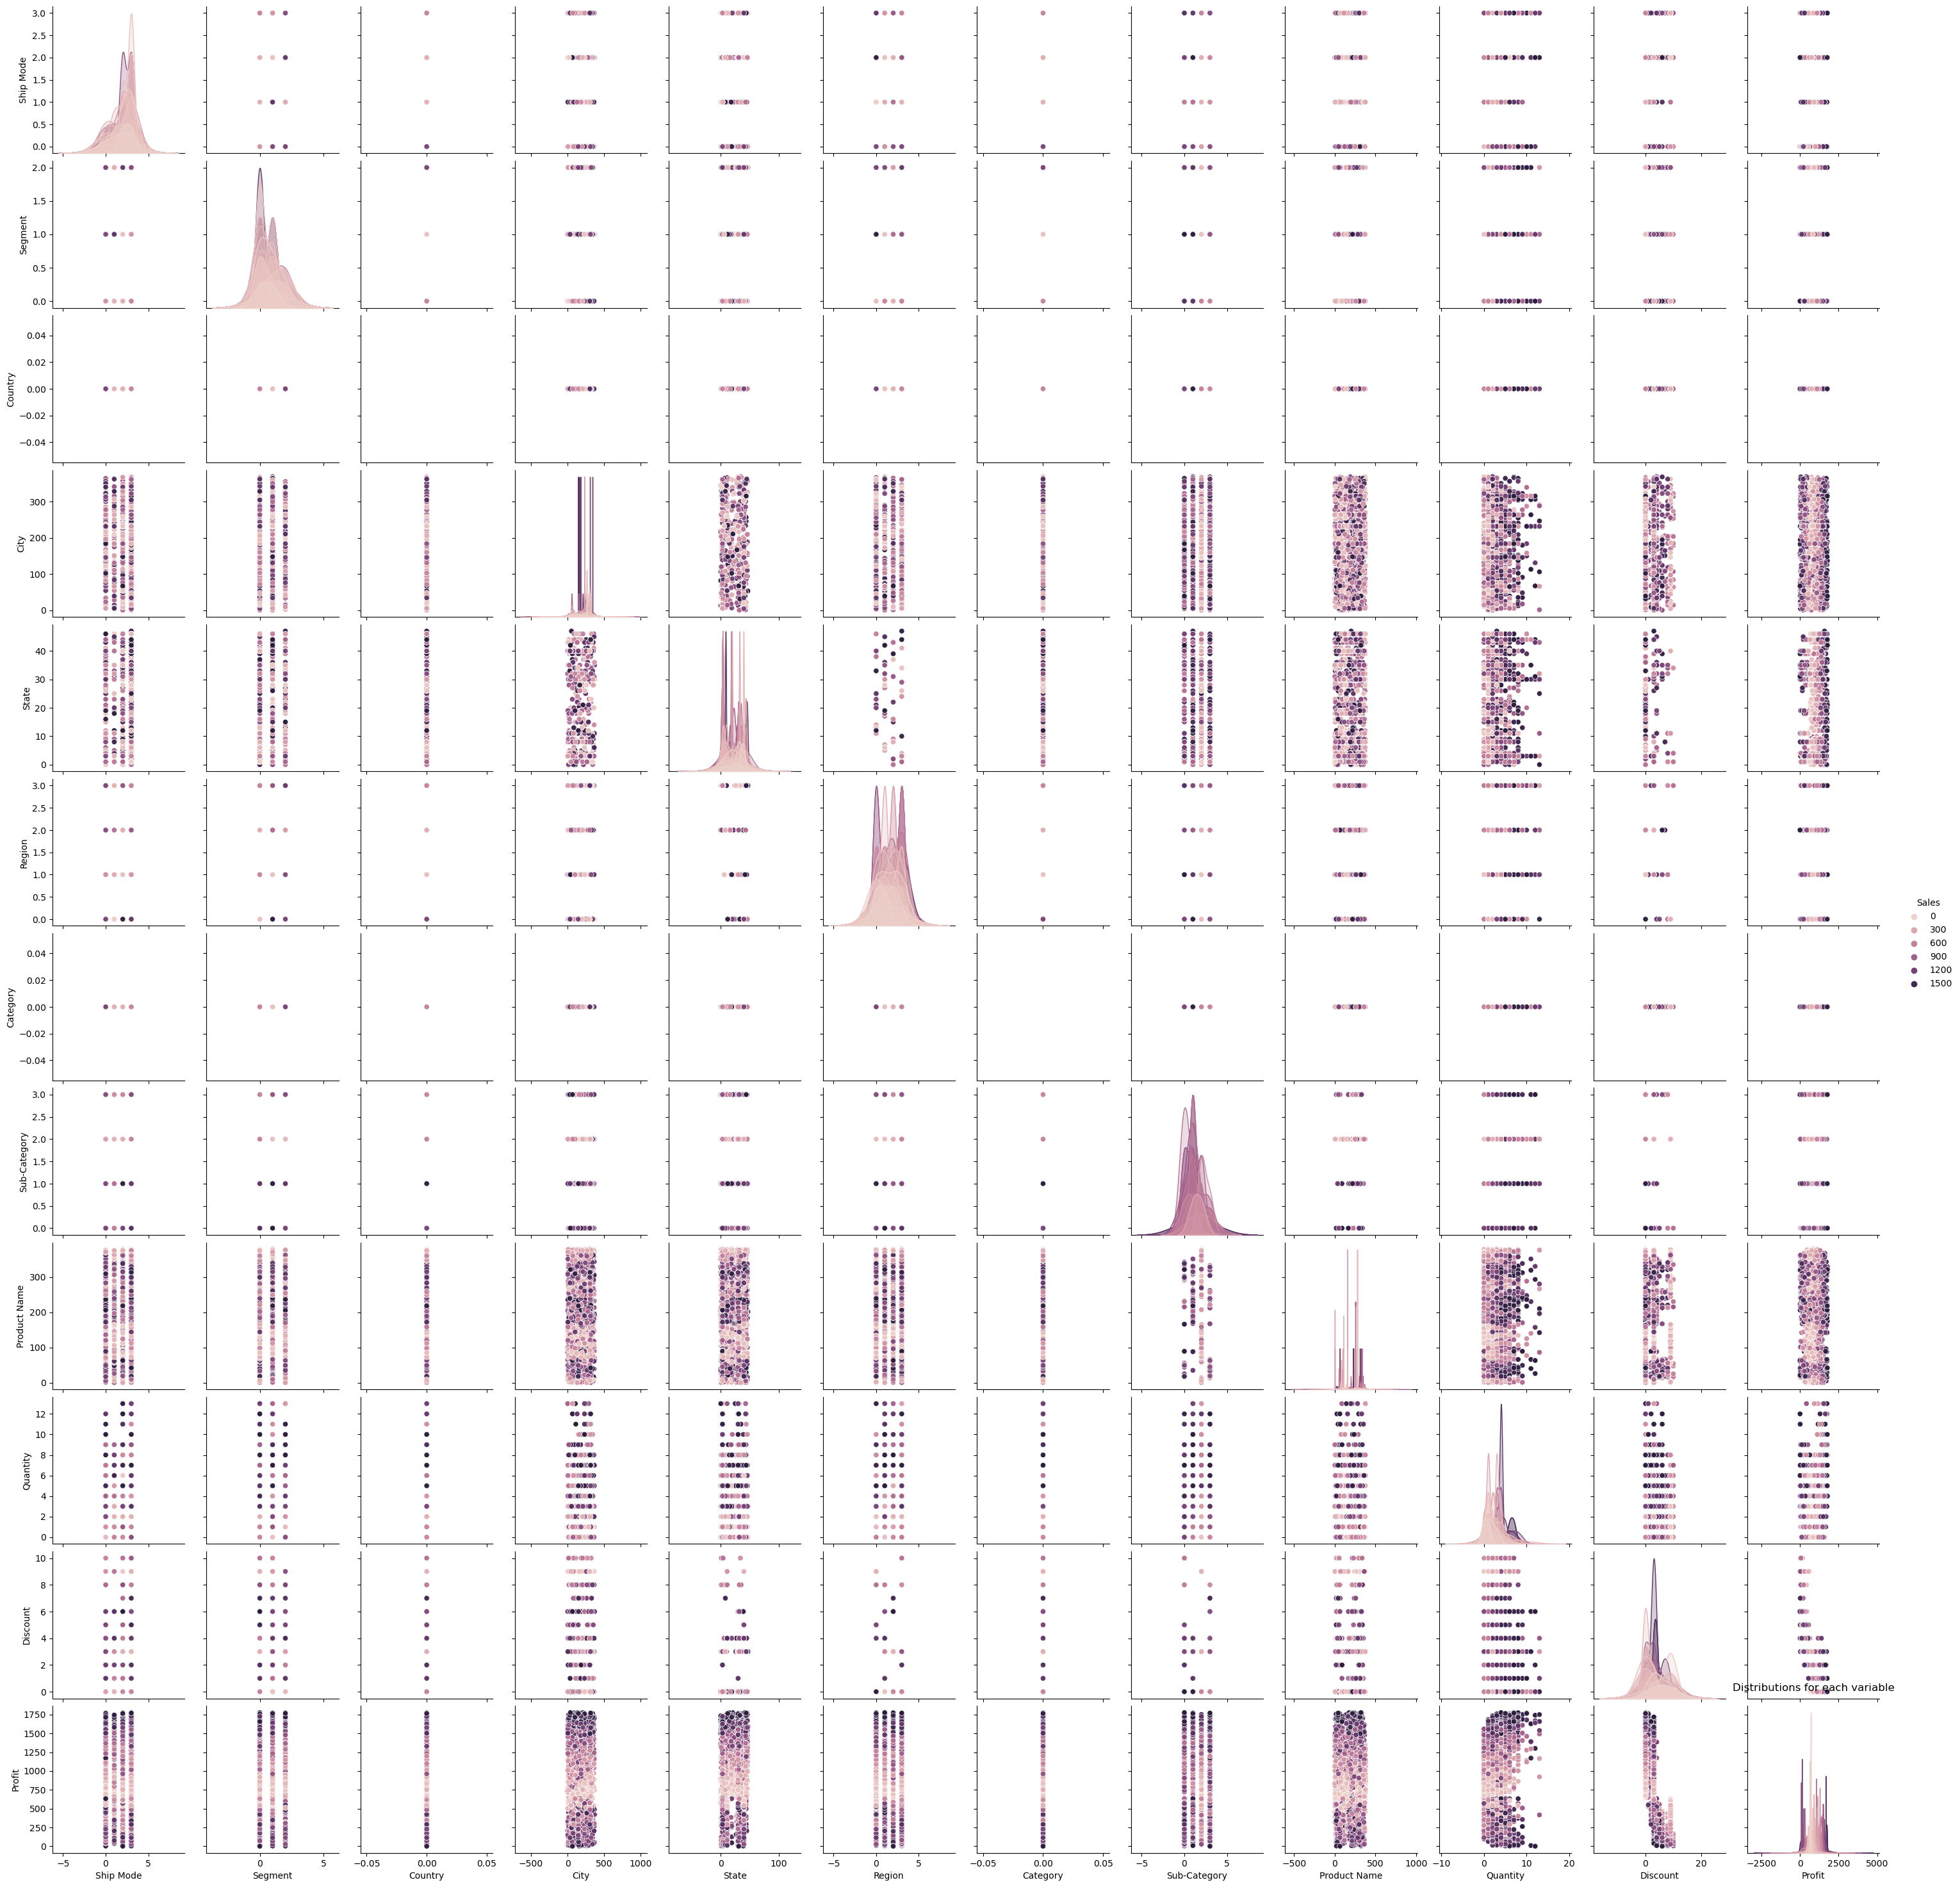

In [37]:
sns.pairplot(data=df, hue="Sales")
plt.title('Distributions for each variable')
plt.show()

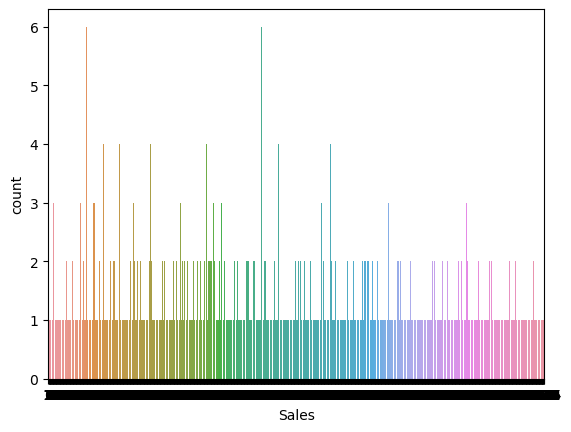

In [39]:
sns.countplot(x=df['Sales'])
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

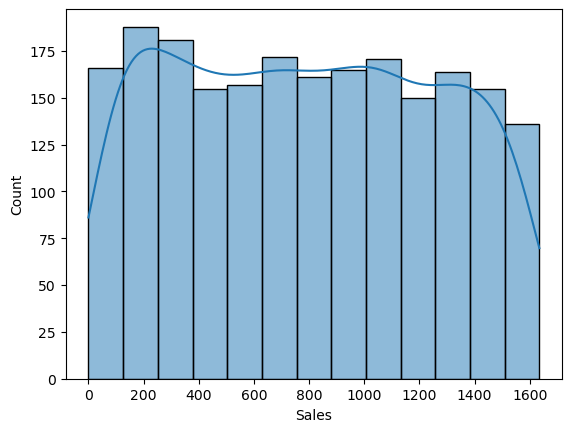

In [90]:
sns.histplot(df['Sales'],kde=True)

<Axes: >

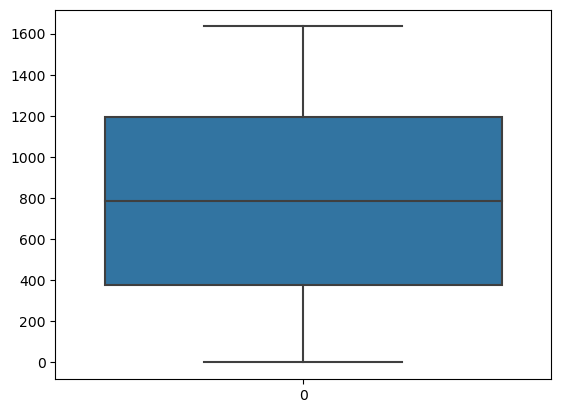

In [92]:
sns.boxplot(df['Sales'])

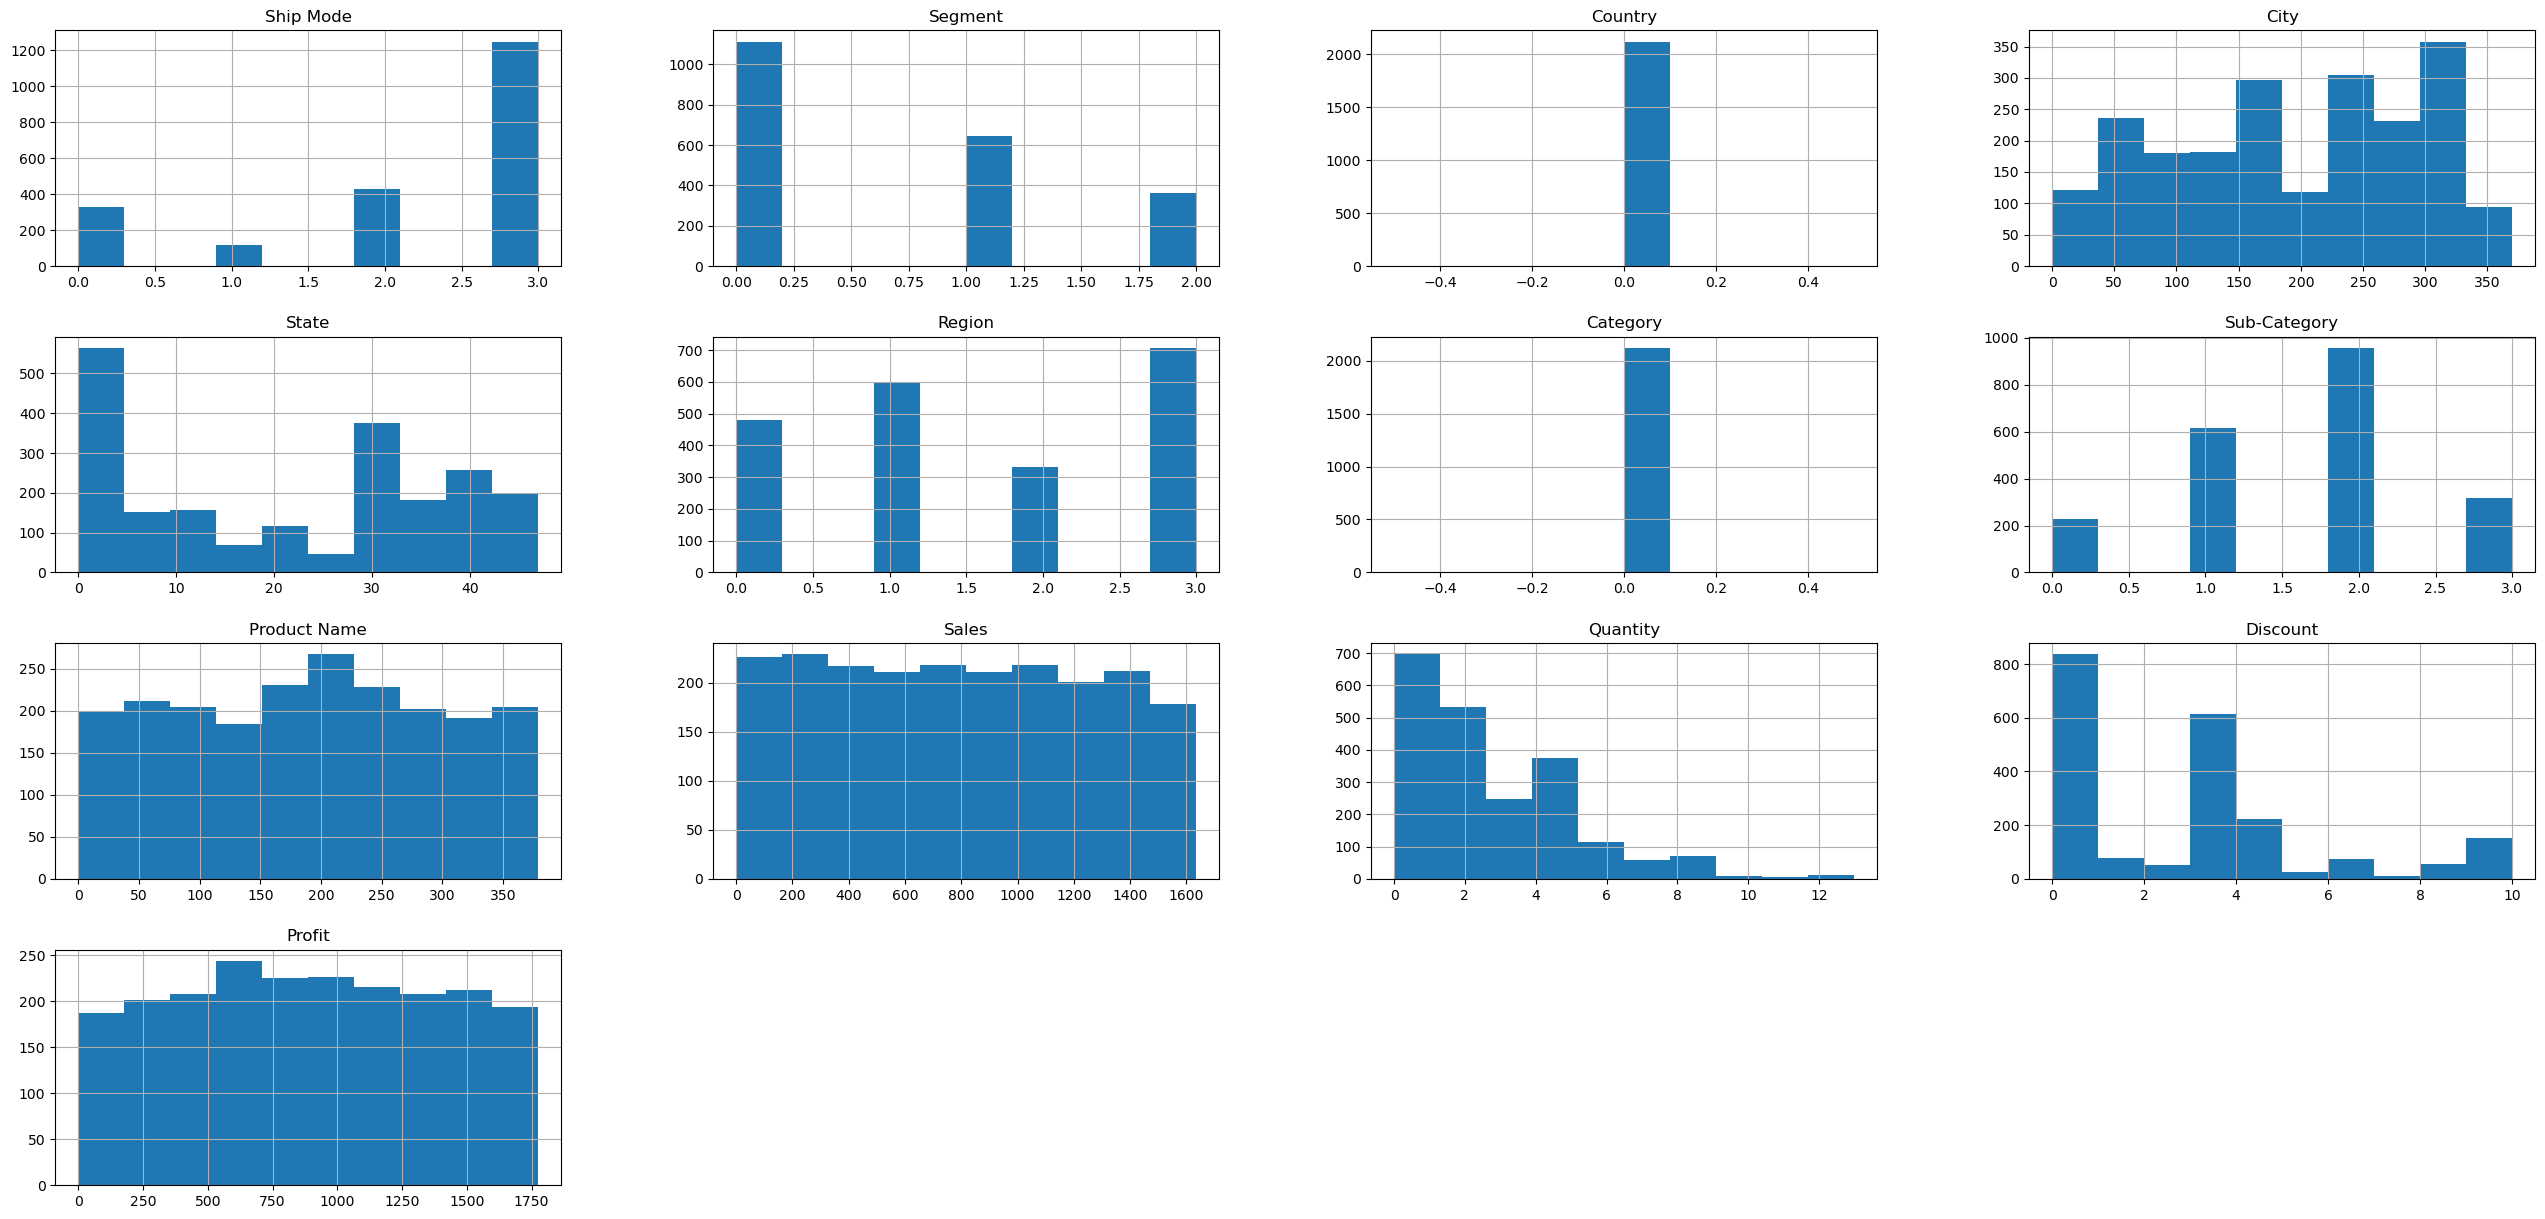

In [93]:
df.hist(figsize=(32,15))
plt.show()

<Axes: >

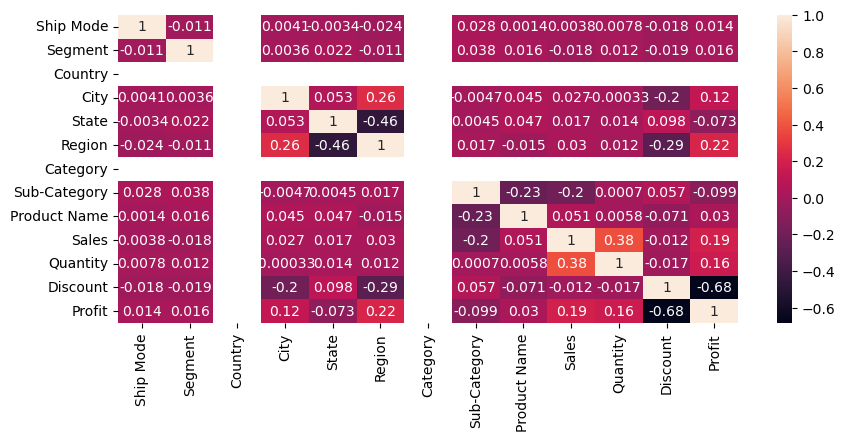

In [88]:
# check the correlation using Heat map
corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True)

<Axes: xlabel='Sales', ylabel='Count'>

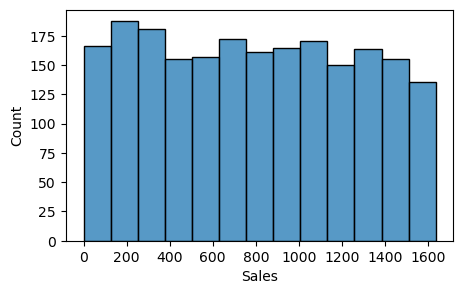

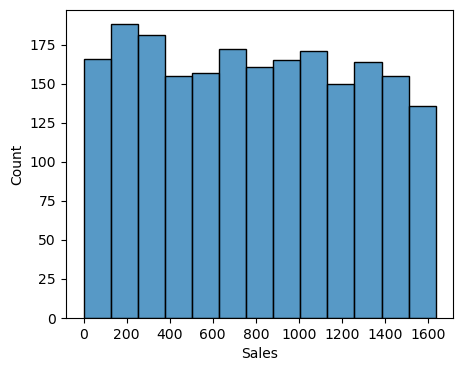

In [85]:
# plt the histogram for sales
plt.figure(figsize=(5,3))
sns.histplot(df['Sales'])

plt.figure(figsize=(5,4))
sns.histplot(df['Sales'])

In [43]:
# Run this cell
X = df.drop('Sales',axis=1)
Y = df['Sales']

In [44]:
X.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit
0,2,0,0,137,15,2,0,0,52,1,0,1384
1,2,0,0,137,15,2,0,1,225,2,0,1695
2,3,0,0,108,8,2,0,3,38,4,7,26
3,3,0,0,184,3,3,0,2,129,6,0,1059
4,3,0,0,184,3,3,0,3,65,8,3,1557


In [45]:
Y.head()

0     965
1    1395
2    1471
3     388
4    1586
Name: Sales, dtype: int64

In [47]:
# Run this cell
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (1696, 12) (1696,)
Test size:  (425, 12) (425,)


In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_train,y_train)
X_scaled

array([[-0.21211995, -0.86367801,  0.        , ..., -0.79101045,
         0.17370265,  0.12453666],
       [ 0.70328829, -0.86367801,  0.        , ...,  0.53857698,
         0.17370265, -0.34840239],
       [-1.12752819, -0.86367801,  0.        , ...,  0.53857698,
         0.53921096, -1.4060298 ],
       ...,
       [ 0.70328829, -0.86367801,  0.        , ..., -0.79101045,
         0.53921096, -1.11468338],
       [ 0.70328829, -0.86367801,  0.        , ..., -0.34781464,
        -0.19180566,  0.67131008],
       [ 0.70328829,  0.46433459,  0.        , ..., -1.23420626,
        -0.55731397,  0.38595023]])

In [69]:
#Predicted model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(X_scaled,y_train)
y_pred=lr.predict(X_test)
y_pred

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([192509.99112325, 188305.22084945, 127378.54581308,  51934.96008858,
        95342.94487947, 143800.50302501,  97427.29882626, 121349.33903802,
       200465.74712909, 122820.60507559,  95854.56227256,  33551.42965241,
        42719.49970165,  73895.6461144 ,  87563.72590069,  70780.40772761,
        36994.10500535, 101683.86448687,  16628.90991309,  72696.8623021 ,
       129998.83690675,  76499.64864824, 169779.48895547, 102939.86867288,
       132139.54962901,  77875.7358342 , 140665.84061509,  31541.04745781,
       114929.99363805, 139468.32717669, 136366.13912728,  42243.43745041,
       142077.08834993,   4766.58754162,  97710.60450172, 139274.5725876 ,
       166026.62028293, 129187.31853022,  63255.12582191, 182976.74530895,
        80387.54961327, 172966.57237957,  74874.77225907,  92665.48139202,
       117102.35803152, 128402.82279246,  96455.10799281,  39982.41269772,
        17197.96748586,  67621.16862325,  76693.40969991,  78417.07164997,
       145957.11128977,  

In [70]:
#Mean Absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 105207.4672911645


In [71]:
#Mean squared error
mse1=mean_squared_error(y_test,y_pred)
print(f'Mean squared Error: {mse1}')

Mean squared Error: 14205415681.292027


In [72]:
# r2 score
r2score=r2_score(y_test,y_pred)
print(f'r2score: {r2score}')

r2score: -65352.20328812031


In [73]:
#root mean square error
rmse = np.sqrt(mse1)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 119186.47440583192


In [74]:
from sklearn.svm import SVR
svc=SVR()
svc.fit(X_scaled,y_train)
y_pred1=svc.predict(X_test)
y_pred1

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10496697,
       808.10496697, 808.10496697, 808.10496697, 808.10

In [75]:
#Mean absolut error
mae = mean_absolute_error(y_test, y_pred1)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 404.08321075446776


In [76]:
# Mean squared error
mse=mean_squared_error(y_test,y_pred1)
print(f'Mean squared Error: {mse}')

Mean squared Error: 217647.27937153305


In [77]:
# R2 score
r2score=r2_score(y_test,y_pred1)
print(f'r2score: {r2score}')

r2score: -0.0013045174458703457


In [78]:
#root mean square error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 466.526825993461


In [79]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_scaled,y_train)
y_pred2=dt.predict(X_test)
y_pred2

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588., 1588.,
       1588., 1588.,

In [80]:
#Model Evaluation
mae2 = mean_absolute_error(y_test, y_pred2)
print(f'Mean Absolute Error: {mae}')
mse2=mean_squared_error(y_test,y_pred2)
print(f'Mean squared Error: {mse}')
r2score1=r2_score(y_test,y_pred1)
print(f'r2score: {r2score1}')
#root mean square error
rmse1 = np.sqrt(mse2)
print(f'Root Mean Squared Error: {rmse1}')

Mean Absolute Error: 404.08321075446776
Mean squared Error: 217647.27937153305
r2score: -0.0013045174458703457
Root Mean Squared Error: 924.0087279954474


In [81]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_scaled,y_train)
y_pred3=rf.predict(X_test)
y_pred3

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([1608.14, 1614.12, 1601.5 , 1601.15, 1613.72, 1610.42, 1613.81,
       1613.81, 1608.81, 1608.05, 1614.12, 1608.18, 1608.19, 1611.11,
       1601.02, 1606.22, 1608.98, 1611.04, 1613.84, 1610.98, 1613.84,
       1611.76, 1608.05, 1613.81, 1608.76, 1610.  , 1613.84, 1610.55,
       1613.49, 1613.61, 1613.84, 1607.02, 1611.68, 1613.8 , 1611.11,
       1601.15, 1608.18, 1613.84, 1613.8 , 1613.68, 1610.42, 1609.05,
       1601.5 , 1608.76, 1610.84, 1601.15, 1613.49, 1613.72, 1613.61,
       1610.42, 1610.04, 1610.48, 1608.14, 1608.01, 1610.59, 1609.91,
       1613.8 , 1610.61, 1613.72, 1600.78, 1599.02, 1613.81, 1609.87,
       1613.8 , 1608.14, 1611.11, 1610.55, 1601.02, 1613.8 , 1613.8 ,
       1610.55, 1613.72, 1608.05, 1610.61, 1610.04, 1608.15, 1614.  ,
       1610.55, 1610.01, 1611.73, 1614.71, 1608.63, 1599.35, 1613.99,
       1610.55, 1613.84, 1613.64, 1608.15, 1610.55, 1610.29, 1610.42,
       1613.72, 1614.71, 1601.15, 1608.18, 1608.18, 1608.18, 1601.63,
       1614.09, 1613

In [82]:
#Model Evaluation
mae3 = mean_absolute_error(y_test, y_pred3)
print(f'Mean Absolute Error: {mae3}')
mse3=mean_squared_error(y_test,y_pred3)
print(f'Mean squared Error: {mse3}')
r2score2=r2_score(y_test,y_pred2)
print(f'r2score: {r2score2}')
#root mean square error
rmse2 = np.sqrt(mse3)
print(f'Root Mean Squared Error: {rmse2}')

Mean Absolute Error: 820.5246588235295
Mean squared Error: 888647.1861289411
r2score: -2.9279421208861924
Root Mean Squared Error: 942.6808506217474


In [96]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
pipe = Pipeline(steps=[('scaler', StandardScaler()),('One Hot Encoding',OneHotEncoder())])

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def predictmodels(clf_A,clf_B,clf_C,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  results = {}
  df = pd.DataFrame()
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      clf = clf.fit(X_train, y_train)
      try:
        predictions_test = clf.predict(X_test)
      except:
        predictions_test = clf_A.predict(X_test)
     # print(clf)
     # print("MSE",mean_squared_error(y_test,predictions_test))
     # print("RMSE",np.sqrt(mean_squared_error(y_test,predictions_test)))
     # print("R2",r2_score(y_test,predictions_test))
     # print()
      row={'MSE':mean_squared_error(y_test,predictions_test),'RMSE':np.sqrt(mean_squared_error(y_test,predictions_test)),'R2':r2_score(y_test,predictions_test)}
      rows=[mean_squared_error(y_test,predictions_test),np.sqrt(mean_squared_error(y_test,predictions_test)),r2_score(y_test,predictions_test)]
      d = {clf_name: row}
      if df.empty:
        df=pd.DataFrame(data=d)
      else:
        df[clf_name]=rows
  return df

In [100]:
X=df
y=df['Sales']
X=X.drop(columns=['Sales'])
predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X,y)

Training set has 1696 samples.
Testing set has 425 samples.



,LinearRegression,Lasso,PolynomialFeatures
MSE,168790.577401,168857.857680,168790.577401
R2,0.223465,410.923177,410.841304
RMSE,410.841304,0.223155,0.223465


In [101]:
predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),linear_model.BayesianRidge(),X,y)

Training set has 1696 samples.
Testing set has 425 samples.



,DecisionTreeRegressor,RandomForestRegressor,BayesianRidge
MSE,43144.632941,22998.854927,169202.087904
R2,0.801510,151.653734,411.341814
RMSE,207.712862,0.894192,0.221572
